In [465]:
import pandas as pd
import numpy as np
import random

df = pd.read_csv('distances.csv')

In [466]:
# Preview
df.head(5)

,Unnamed: 0,Start,Target,Distance
0,0,Aberdeen,Aberdeen,0
1,1,Aberdeen,Adelaide,16192
2,2,Aberdeen,Algiers,2291
3,3,Aberdeen,Amsterdam,696
4,4,Aberdeen,Ankara,3158


In [467]:
def get_distance_matrix_from_df(df: pd.DataFrame, column: str, unique_points: int):
    # Get all distances in a list
    distances = [i for i in df[column]]
    # Transform to distance matrix in chunk size unique_points
    distance_matrix = [distances[i:i + unique_points] for i in range(0, len(distances), unique_points)]
    
    return distance_matrix

The method below works by getting a list with distances of all possible points, replacing visited points with zeros and then get the lowest point above 0. 

In [478]:
total_travel_distances = []
# Number of all travel points
number_of_cities = len(pd.unique(df["Start"]))

# Loop thorugh all possible startpoints
for start_point in range(number_of_cities):
    
    # Set start values
    current_point = start_point
    total_distance = 0
    
    distance_matrix = get_distance_matrix_from_df(df, "Distance", number_of_cities)
    
    visted_points_indexes = []
    visted_points_indexes.append(start_point)
    
    
    # Loop through points
    for _ in range(len(distance_matrix)-1):
        
        # Add current point to visited list
        visted_points_indexes.append(current_point)
        
        # Get all travel points and replace visited points with zeroes
        possible_travel_points = distance_matrix[current_point]
        for index in sorted(visted_points_indexes, reverse=True):
            possible_travel_points[index] = 0
        
        # Choose shortest distance above 0
        shortest_distance = min(list(filter(lambda x: x > 0, possible_travel_points)))
        shortest_point_index = possible_travel_points.index(shortest_distance)

        # Add distance to total
        total_distance += shortest_distance
        
        # Update current point
        current_point = shortest_point_index
        
        
    # Add distance from last to first point
    possible_travel_points = distance_matrix[current_point]
    distance = possible_travel_points[start_point]
    total_distance += distance
    
    total_travel_distances.append(total_distance)

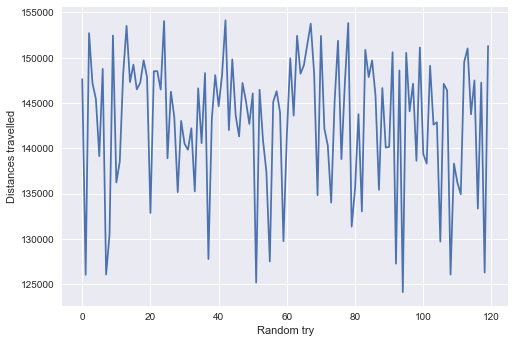

In [479]:
from matplotlib import pyplot as plt

# Plotting
plt.style.use('seaborn')
plt.plot(total_travel_distances)
plt.xlabel('Random try')
plt.ylabel('Distances travelled')

plt.show()